# DA 224-O Practical Machine Learning
### Tutorial on Dimensionality Reduction

##Learning Objectives

At the end of the experiment, you will be able to

* understand what is Dimensionality Reduction
* perform  Dimensionality Reduction(PCA,KPCA)

### Introduction

Many Machine Learning problems involve thousands or even millions of features for each training instance. Not only do all these features make training extremely slow,but they can also make it much harder to find a good solution. This problem is often     referred to as the curse of dimensionality.Apart from speeding up training, dimensionality reduction is also extremely useful
for data visualization.

Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables. 

Dimensionality Reduction ideas:


*   Projection
*   Manifold learning



We will go through two of the most popular dimensionality reduction techniques: PCA and Kernel PCA.Both of them are based on projection.


### Import required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches, image
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sklearn
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

##PCA

Principal component Aanalysis is a technique that is widely used for applications such as dimensionality reduction, lossy data compression,feature extraction and data visualization.First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it. 


There are two commonly used definitions of PCA that give rise to the same algorithm. PCA can be defined as the orthogonal projection of the data onto a lower dimensional linear space,known as the principal subspace such that the variance of the projected data is maximum.Equivalently,it can be defined as the linear projection that minimizes the average projection cost,defined as the mean squared distance between the data points and their projections.

Exercise 1:Load breast _cancer dataset 

In [35]:
#import the breast _cancer dataset
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()

In [45]:
#Dimension of the data
np.shape(data['data'])

(569, 30)

In [46]:


# Check the input attributes
print(data['feature_names'])


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [42]:
# construct a dataframe using pandas
df1=pd.DataFrame(data['data'],columns=data['feature_names'])

Exercise 2: Reduce the dimension of the data to 3 by applying PCA.

Scikit-Learn’s PCA class uses SVD decomposition to implement PCA

In [47]:
# Scale data before applying PCA
scaling=StandardScaler()
scaling.fit(df1)
Scaled_data=scaling.transform(df1)

In [48]:
#n_components=3
principal=PCA(n_components=3)  #it automatically takes care of centering the data
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

In [49]:
#dimensions of data after PCA
print(x.shape)

(569, 2)


PCA assumes that the dataset is centered around the origin.Scikit-Learn’s PCA classes take care of centering the data.


Exercise 3: calculate how much variance is explained by each principal component

In [50]:
# check how much variance is explained by each principal component
print(principal.explained_variance_ratio_)

[0.44272026 0.18971182]


The ratio indicates the proportion of the dataset’s variance that lies along each principal component. 

Exercise 4: Print Principal axes in feature space, representing the directions of maximum variance in the data. 

In [51]:
# values of eigen vectors
principal.components_ 


array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

Exercise 5: Calculate the reconstruction loss

In [52]:
#Reconstruction loss
X_recovered = principal.inverse_transform(x)

In [53]:
np.shape(X_recovered)

(569, 30)

In [54]:
from sklearn.metrics import mean_squared_error
loss=mean_squared_error(Scaled_data,X_recovered)
print("reconstruction loss= ",loss)

reconstruction loss=  0.36756792348440553


Exercise 6: computes the minimum number of dimensions required to preserve 95% of the data set’s variance

In [55]:
#The following code performs PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 95% of the training set’s
#variance
pca = PCA()
pca.fit(Scaled_data)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1


In [56]:
d

10

In [16]:
#instead of specifying the number of principal components you want to preserve, you can set n_components to be a float between 0.0 and 1.0, indicating the ratio
#of variance you wish to preserve:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(Scaled_data)

In [17]:
X_reduced.shape

(569, 10)

Exercise 7: Plot the explained variance as a function of the number of
dimensions

Text(0, 0.5, 'variance')

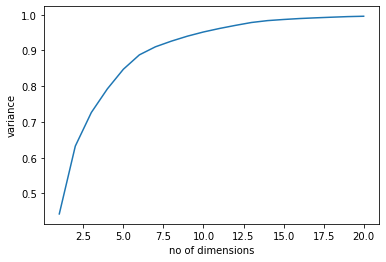

In [18]:
dimensions=np.arange(1,21)

principal=PCA(n_components=20)  
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
cumsum=np.cumsum(principal.explained_variance_ratio_)

cumsum=np.array(cumsum)
plt.plot(dimensions,cumsum)
plt.xlabel("no of dimensions")
plt.ylabel("variance")

There will usually be an elbow in the curve, where the explained variance stops growing fast. In this case, you can see that
reducing the dimensionality down to about 10 dimensions wouldn’t lose too much explained variance.

##KPCA

The principal components of a set of data in $R^p$ provide a sequence of best linear approximations to that data, of all ranks q ≤p .If the data lies on a linear subspace or close to a linear subspace, this approximation works best, but if the data lies on a non linear manifold the quality of this approximation is not good, since PCA is a linear technique. In such cases you can use any Non-linear dimension reduction algorithms such as Principal curves and manifolds, Kernel principal component analysis, Locally-linear embedding, Autoencoders to name a few.

Kernel PCA uses a kernel function to project dataset into a higher dimensional feature space, where a linear subspace exists. It is similar to the idea of Support Vector Machines.There are different choices for the kernel matrix.Common ones are the Gaussian kernel or the polynomial kernel. A polynomial kernel would be the right choice for decision boundaries that are polynomial in shape. A Gaussian kernel is a good choice whenever one wants to distinguish data points based on the distance from a common centre.





Exercise 8:Load moon's dataset for KPCA implementation

In [29]:
#Let's use moon's dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=250,noise=0.05, random_state=0)

In [20]:
np.shape(y)

(250,)

Text(0, 0.5, 'y')

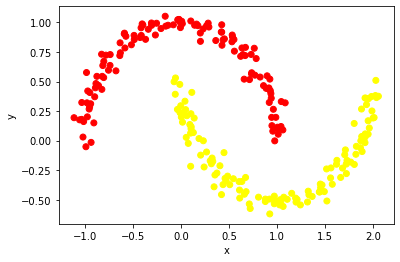

In [31]:
#visualization of our dataset
plt.scatter(X[:,0],X[:,1],c=y,cmap='autumn')
plt.xlabel('x')
plt.ylabel('y')


Exercise 9 :Using PCA reduce the dimension of moon's dataset to 1 and classify the data by logistic regression.

In [22]:
#splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

#classification pipeline
clf = Pipeline([("pca",PCA(n_components=1)),("log_reg", LogisticRegression())])

clf.fit(X_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=1)),
                ('log_reg', LogisticRegression())])

In [23]:
y_predict=clf.predict(X_test)

In [24]:
#classification score
clf.score(X_test,y_test)

0.68

Classification score is low when we use the linear standard PCA classifier for dimensionality reduction.The result will be the same if we use KPCA with linear kernel.

Exercise 10 : Using KPCA with rbf kernel and gamma=15 ,reduce the dimension of moon's dataset to 1 and classify the data by logistic regression.

In [25]:
clf = Pipeline([("kpca",KernelPCA(n_components=1,kernel="rbf",gamma=15)),("log_reg", LogisticRegression())])

clf.fit(X_train,y_train)

Pipeline(steps=[('kpca', KernelPCA(gamma=15, kernel='rbf', n_components=1)),
                ('log_reg', LogisticRegression())])

In [26]:
#classification score
clf.score(X_test,y_test)

0.88

When we use kPCA with rbf kernel classification score becomes 0.88.We can see that if used kPCA as a preprocessor for a classification pipeline, then those datasets can be handled efficiently.

Exercise 11: Visualize PCA and kPCA projections without reducing dimension.

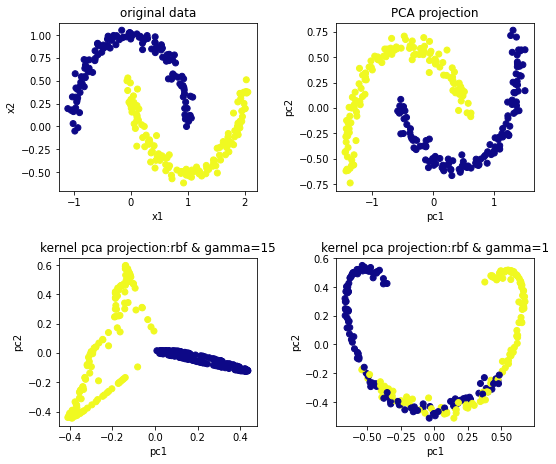

In [27]:
#visualize data
plt.subplot(2,2,1)
plt.scatter(X[:,0],X[:,1],c=y,cmap='plasma')
plt.xlabel('x1')
plt.ylabel("x2")
plt.title("original data")

#n_components=2
pca=PCA(n_components=2)
pca.fit(X)
X_transformed =pca.transform(X)
#X_transformed.shape

#visualize data
plt.subplot(2,2,2)
plt.scatter(X_transformed[:,0],X_transformed[:,1],c=y,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel("pc2")
plt.title("PCA projection")


KPCA= KernelPCA(n_components=2, kernel='rbf',gamma=15)
KPCA.fit(X)
X_transformed =KPCA.transform(X)
#X_transformed.shape

#visualize data
plt.subplot(2,2,3)
plt.scatter(X_transformed[:,0],X_transformed[:,1],c=y,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel("pc2")
plt.title("kernel pca projection:rbf & gamma=15")

KPCA= KernelPCA(n_components=2, kernel='rbf',gamma=1)
KPCA.fit(X)
X_transformed =KPCA.transform(X)
#X_transformed.shape

#visualize data
plt.subplot(2,2,4)
plt.scatter(X_transformed[:,0],X_transformed[:,1],c=y,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel("pc2")
plt.title("kernel pca projection:rbf & gamma=1")

plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=1.2, 
                    top=1.6, 
                    wspace=0.4, 
                    hspace=0.4)

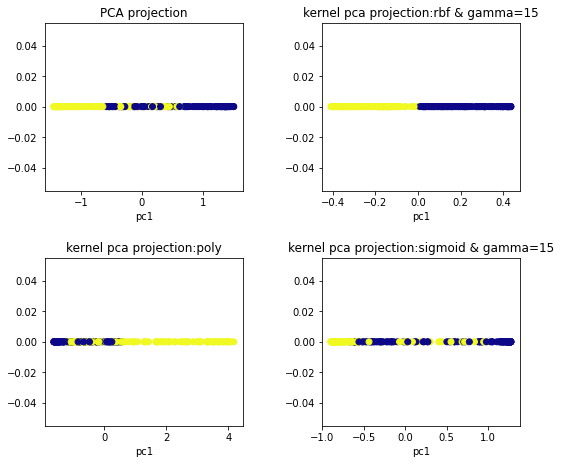

In [28]:
#Visualize PCA and KPCA projections after reducing dimension to 1.

pca=PCA(n_components=1)
pca.fit(X)
X_transformed =pca.transform(X)
#X_transformed.shape

#visualize data
plt.subplot(2,2,1)
plt.scatter(X_transformed[:,0],np.zeros(len(X_transformed)),c=y,cmap='plasma')
plt.xlabel('pc1')
plt.title("PCA projection")


KPCA= KernelPCA(n_components=1, kernel='rbf',gamma=15)
KPCA.fit(X)
X_transformed =KPCA.transform(X)
#X_transformed.shape

#visualize data
plt.subplot(2,2,2)
plt.scatter(X_transformed[:,0],np.zeros(len(X_transformed)),c=y,cmap='plasma')
plt.xlabel('pc1')
plt.title("kernel pca projection:rbf & gamma=15")

KPCA= KernelPCA(n_components=2, kernel='poly')
KPCA.fit(X)
X_transformed =KPCA.transform(X)
#X_transformed.shape

#visualize data
plt.subplot(2,2,3)
plt.scatter(X_transformed[:,0],np.zeros(len(X_transformed)),c=y,cmap='plasma')
plt.xlabel('pc1')
plt.title("kernel pca projection:poly")


KPCA= KernelPCA(n_components=1, kernel='sigmoid',gamma=15)
KPCA.fit(X)
X_transformed =KPCA.transform(X)
#X_transformed.shape

#visualize data
plt.subplot(2,2,4)
plt.scatter(X_transformed[:,0],np.zeros(len(X_transformed)),c=y,cmap='plasma')
plt.xlabel('pc1')
plt.title("kernel pca projection:sigmoid & gamma=15")

plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=1.2, 
                    top=1.6, 
                    wspace=0.4, 
                    hspace=0.4)

Using a kernel allows to make a non-linear projection. Here, by using an RBF kernel, we can see that the projection unfolds the dataset while keeping approximately preserving the relative distances of pairs of data points that are close to one another in the original space.